# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Joseph
[nltk_data]     Shimonov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Joseph
[nltk_data]     Shimonov\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to C:\Users\Joseph
[nltk_data]     Shimonov\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [4]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
df = pd.read_csv('data/20-newsgroups.csv')

# 2. Print the shape
print(df.shape)
df.head()


(11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [5]:
# 3. Inspect / remove nulls and duplicates
df.isnull().sum()

id                0
message           0
topic             0
topic_category    0
dtype: int64

In [6]:
# 4. Find class balances, print out how many of each topic_category there are.
df.duplicated().sum()

0

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [7]:
# 1. Make a function that makes all text lowercase.
def convert_to_lowercase(text):
    return text.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
convert_to_lowercase(test_string)


'this is a sentence with lots of caps.'

In [8]:
# 2. Make a function that removes all punctuation. 
def remove_all_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_all_punctuation(test_string)


'This is a sentence 50 With lots of punctuation  other things'

In [10]:
# 3. Make a function that removes all stopwords.
def remove_all_stopwords(text):
    # convert the sentence to a list of words
    words = word_tokenize(text)

    # make a list to store all the words that are not stopwords
    valid_words = []

    # loop thru the words in words list
    for word in words:
        # check if current word is not a stopword
        if word not in stopwords:
            # append to valid list
            valid_words.append(word)
    
    # join the list of valid words to a string
    text = ' '.join(valid_words)

    # return new text
    return text

test_string = 'This is a sentence! With some different stopwords i have added in here.'
remove_all_stopwords(test_string)


'This sentence ! With different stopwords added .'

In [11]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 
def stem_words(text):
    # initialize stemmer
    porter = PorterStemmer()

    # Convert text sentence to a list of words
    words = word_tokenize(text)

    # make a list to store all the words that are not stopwords
    valid_words = []

    # iterate thru the words list
    for word in words:
        # Stem the current word
        stemmed_word = porter.stem(word)

        # append stemmed word to valid words list
        valid_words.append(stemmed_word)

    # join valid words together
    text = ' '.join(valid_words)

    # return new text
    return text

test_string = 'I played and started playing with players and we all love to play with plays'
stem_words(test_string)



'I play and start play with player and we all love to play with play'

In [12]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
def text_pipeline(text):
    text = convert_to_lowercase(text)
    text = remove_all_punctuation(text)
    text = remove_all_stopwords(text)
    
    return text

test_string = 'I played and started playing with players and we all love to play with plays'
text_pipeline(test_string)

'played started playing players love play plays'

In [13]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message'].apply(text_pipeline)

print("ORIGINAL TEXT:", df['message'][0])
print("CLEANED TEXT:", df['message_clean'][0])

ORIGINAL TEXT: From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





CLEANED TEXT: lerxstwamumdedu wheres thing subject car nntppostinghost rac3wamumdedu organization university maryland college park lines 15 wondering anyone could enlighten car saw day 2door sports car looked late 60s early 70s called bricklin doors really small 

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [14]:
# 1. Define your `X` and `y` data. 
X = df['message_clean'].values

y = df['topic_category'].values


In [16]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
vectorizer = TfidfVectorizer()


In [17]:
# 3. Fit your vectorizer using your X data
vectorizer.fit(X)

TfidfVectorizer()

In [18]:
# 4. Transform your X data using your fitted vectorizer. 
X = vectorizer.transform(X)


In [19]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print(X.shape, type(X))


(11314, 139767) <class 'scipy.sparse.csr.csr_matrix'>


# Split your data into Training and Testing data. 

In [20]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 48)

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [21]:
# 1. Initalize an empty model. 
model = MultinomialNB(alpha = .05)



In [22]:
# Fit our model with our training data.
model.fit(X_train, y_train)



MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [23]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)


In [24]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.910296


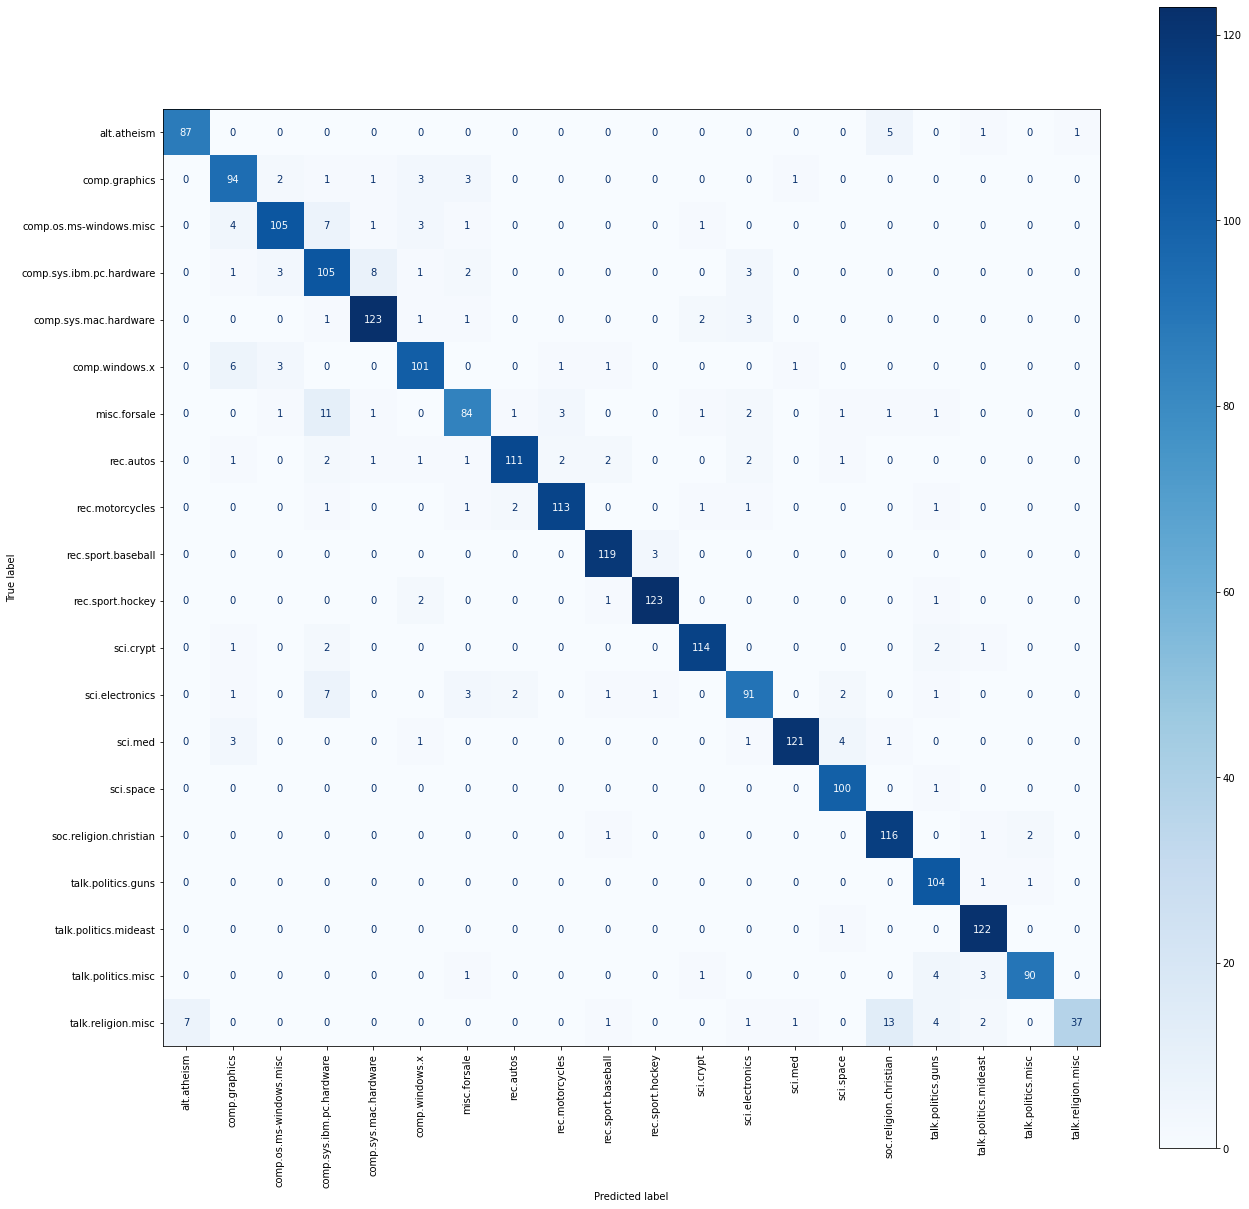

In [25]:
# 3. Plot the confusion matrix of our predictions
fig, ax = plt.subplots(figsize = (21, 21))

disp = plot_confusion_matrix(model,
                             X_test,
                             y_test,
                             display_labels = model.classes_,
                             cmap = plt.cm.Blues,
                             ax = ax)

plt.xticks(rotation = 90)
disp


In [27]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
rf_model = RandomForestClassifier()

# fit model
rf_model.fit(X_train, y_train)

# make predictions using test data
y_pred = rf_model.predict(X_test)

# make probability predictions using test data
y_pred_proba = rf_model.predict_proba(X_test)

# evaluate the model
accuracy = rf_model.score(X_test, y_test)

# Print accuracy
print("Model Accuracy: %f" % accuracy)

print(classification_report(y_test, y_pred, target_names = rf_model.classes_))


Model Accuracy: 0.846664
                          precision    recall  f1-score   support

             alt.atheism       0.92      0.88      0.90        94
           comp.graphics       0.65      0.81      0.72       105
 comp.os.ms-windows.misc       0.75      0.83      0.79       122
comp.sys.ibm.pc.hardware       0.72      0.69      0.71       123
   comp.sys.mac.hardware       0.84      0.79      0.81       131
          comp.windows.x       0.81      0.85      0.83       113
            misc.forsale       0.72      0.85      0.78       107
               rec.autos       0.86      0.81      0.83       124
         rec.motorcycles       0.95      0.91      0.93       120
      rec.sport.baseball       0.91      0.93      0.92       122
        rec.sport.hockey       0.92      0.97      0.95       127
               sci.crypt       0.92      0.97      0.94       120
         sci.electronics       0.75      0.61      0.68       109
                 sci.med       0.97      0.85     

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [ ]:
my_sentence = ???

# 1. Apply the text pipeline to your sentence

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\

# 3. Use the model to predict your new `X`. 

# 4. Print the prediction


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [29]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
df = pd.read_csv('data/dem-vs-rep-tweets.csv')

# 2. Print the shape
print(df.shape)
df.head()




(86460, 3)


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...
